# Music Data Harmonization

#### The Goal:
Collect artist discography data for analysis in bedroom pop genre. This includes artist names, full discography, and song metadata, like streams, release date, and lyrics.

#### The Problem:
There are two primary datasources. LastFM has artist discography data and some song metadata readily available, which I have already scraped.
Lyric data can be scraped from AZLyrics, but there is no easy way to query artist names given our LastFM data source. Some artist names have different abbreviations, or certain songs may include additional featured artists or version types making it difficult to match artist and songs across data sources.

#### The Soltuion:
Create a training corpus and represent features in so that we can match discography data to lyric data.

In [1]:
import pandas as pd
import numpy as np
from urllib.parse import unquote
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_names = [
    "album_tracks_3_20231014_190058.pkl"
]

data_parts = []

for file_name in file_names:
    with open(file_name, "rb") as file:
        data = pickle.load(file)
        data_parts.append(data)

In [3]:
df_lyrics = pd.read_csv('g_track_name_with_links.csv')
df_lyrics2 = pd.read_csv('h_track_name_with_links.csv')
df_lyrics3 = pd.read_csv('i_track_name_with_links.csv')

In [4]:
df_lyrics = pd.concat([df_lyrics, df_lyrics2, df_lyrics3], ignore_index=True, sort=False)

In [5]:
df_lyrics['df_source'] = 'lyrics'

In [6]:
df_lyrics = df_lyrics[(df_lyrics.Year != 'Missing') & (df_lyrics.Lyrics_URL != 'Missing')]

df_lyrics = df_lyrics.dropna(how='any', axis=0)

df_lyrics.shape

(93842, 6)

In [7]:
df_lyrics.head()

,Unnamed: 0,Artist_Name,Song_Title,Year,Lyrics_URL,df_source
0,0,G4 Boyz,"Hair, Nails, Makeup",2013,https://www.azlyrics.com/lyrics/g4boyz/hairnai...,lyrics
1,1,G4 Boyz,Bricks,2014,https://www.azlyrics.com/lyrics/g4boyz/bricks....,lyrics
2,2,G4 Boyz,Alexander Wang,2015,https://www.azlyrics.com/lyrics/g4boyz/alexand...,lyrics
3,3,G4 Boyz,Can't Sit With Us,2015,https://www.azlyrics.com/lyrics/g4boyz/cantsit...,lyrics
4,4,G4 Boyz,The African Plug Intro,2017,https://www.azlyrics.com/lyrics/g4boyz/theafri...,lyrics


In [8]:
column_mapping = {
    'Unnamed: 0	': 'Unnamed: 0',
    'Artist_Name': 'artist_name',
    'Song_Title': 'track_name',
    'Year': 'release_date',
    'Lyrics_URL': 'lyrics_url',
    'df_source': 'df_source'
}

df_lyrics = df_lyrics.rename(columns=column_mapping)

Tuples are structured as follows:

([Dict of Track Name, Listeners], {Dict of album meta data, track length, release data, listeners, plays, album length, artist name}]

#### Truncating to albums with 4 or more tracks.

In [9]:
filtered_albums = [
    album for album in data
    if int(album[1]['Length'].split(' ')[0]) > 3
]

In [10]:
len(filtered_albums)

3628

In [11]:
rows = []

for tracks, metadata in filtered_albums:
    for track in tracks:
        observation = {**track, **metadata}
        rows.append(observation)

df = pd.DataFrame(rows)

df.head(50)

,name,listeners,Length,Release Date,Listeners,Plays,AlbumName,Artist
0,Gershwin+Says,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
1,Waterdays,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
2,Overnight,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
3,Skin+(Stripped+Version),NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
4,Gershwin+Says,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
5,Waterdays,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
6,Overnight,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
7,Skin+(Stripped+Version),NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
8,Gershwin+Says,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss
9,Waterdays,NaN,"4 tracks, 16:40",10 July 2000,1,1,Strip+-+EP,Gloss


In [12]:
column_mapping = {
    'name': 'track_name',
    'listeners': 'track_listeners',
    'Length': 'album_length',
    'Release Date': 'release_date',
    'Listeners': 'album_listeners',
    'Plays': 'album_streams',
    'AlbumName': 'album_name',
    'Artist': 'artist_name'
}

df = df.rename(columns=column_mapping)

In [13]:
unique_artists_count = df['artist_name'].nunique()
print(unique_artists_count)

415


In [14]:
df['df_source'] = 'disc'

In [15]:
df.columns

Index(['track_name', 'track_listeners', 'album_length', 'release_date',
       'album_listeners', 'album_streams', 'album_name', 'artist_name',
       'df_source'],
      dtype='object')

In [16]:
def convert_to_int(val):
    try:
        return int(str(val).replace(',', ''))
    except ValueError:
        return 0

df['album_streams'] = df['album_streams'].apply(convert_to_int)

In [17]:
df.sort_values(by='album_streams', ascending=False).head(50)

,track_name,track_listeners,album_length,release_date,album_listeners,album_streams,album_name,artist_name,df_source
4349,Eight,NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4353,Be+a+Body+(%E4%BE%98%E5%AF%82),NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4348,Oblivion,NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4347,Genesis,NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4346,Infinite+%E2%9D%A4+Without+Fulfillment,NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4356,Nightmusic+(feat.+Majical+Cloudz),NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4354,Colour+of+Moonlight+(Antiochus)+(feat.+Doldrums),NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4355,Symphonia+IX+(My+Wait+Is+U),NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4352,Visiting+Statue,NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc
4351,Vowels+=+space+and+time,NaN,"13 tracks, 46:51",20 February 2012,"1,295,985",45723760,Visions,Grimes,disc


In [18]:
df_lyrics.head()

,Unnamed: 0,artist_name,track_name,release_date,lyrics_url,df_source
0,0,G4 Boyz,"Hair, Nails, Makeup",2013,https://www.azlyrics.com/lyrics/g4boyz/hairnai...,lyrics
1,1,G4 Boyz,Bricks,2014,https://www.azlyrics.com/lyrics/g4boyz/bricks....,lyrics
2,2,G4 Boyz,Alexander Wang,2015,https://www.azlyrics.com/lyrics/g4boyz/alexand...,lyrics
3,3,G4 Boyz,Can't Sit With Us,2015,https://www.azlyrics.com/lyrics/g4boyz/cantsit...,lyrics
4,4,G4 Boyz,The African Plug Intro,2017,https://www.azlyrics.com/lyrics/g4boyz/theafri...,lyrics


In [19]:
df_lyrics[df_lyrics['artist_name'] == 'Grimes']

,Unnamed: 0,artist_name,track_name,release_date,lyrics_url,df_source
49201,49201,Grimes,Caladan,2010,https://www.azlyrics.com/lyrics/grimes/caladan...,lyrics
49202,49202,Grimes,Sardaukar Levenbrech,2010,https://www.azlyrics.com/lyrics/grimes/sardauk...,lyrics
49203,49203,Grimes,"Zoal, Face Dancer",2010,https://www.azlyrics.com/lyrics/grimes/zoalfac...,lyrics
49204,49204,Grimes,Rosa,2010,https://www.azlyrics.com/lyrics/grimes/rosa.html,lyrics
49205,49205,Grimes,Avi,2010,https://www.azlyrics.com/lyrics/grimes/avi.html,lyrics
...,...,...,...,...,...,...
49267,49267,Grimes,We Appreciate Power,2020,https://www.azlyrics.com/lyrics/grimes/weappre...,lyrics
49268,49268,Grimes,So Heavy I Fell Through The Earth (Algorithm Mix),2020,https://www.azlyrics.com/lyrics/grimes/soheavy...,lyrics
49269,49269,Grimes,Violence (Club Mix),2020,https://www.azlyrics.com/lyrics/grimes/violenc...,lyrics
49270,49270,Grimes,My Name Is Dark (Algorithm Mix),2020,https://www.azlyrics.com/lyrics/grimes/mynamei...,lyrics


In [20]:
df = pd.concat([df, df_lyrics], ignore_index=True, sort=False)

In [21]:
def preprocess_text(text):
    decoded_text = unquote(text)
    decoded_text = decoded_text.lower()
    decoded_text = decoded_text.replace("+", " ")
    return decoded_text

df['track_name'] = df['track_name'].apply(preprocess_text)
#df['album_name'] = df['album_name'].apply(preprocess_text)
df['artist_name'] = df['artist_name'].apply(preprocess_text)

In [22]:
df['weighted_combined_text'] = df['artist_name'] + " " + df['artist_name'] + " " + df['artist_name'] + " " + df['track_name']

In [23]:
df.head()

,track_name,track_listeners,album_length,release_date,album_listeners,album_streams,album_name,artist_name,df_source,Unnamed: 0,lyrics_url,weighted_combined_text
0,gershwin says,NaN,"4 tracks, 16:40",10 July 2000,1,1.0,Strip+-+EP,gloss,disc,NaN,NaN,gloss gloss gloss gershwin says
1,waterdays,NaN,"4 tracks, 16:40",10 July 2000,1,1.0,Strip+-+EP,gloss,disc,NaN,NaN,gloss gloss gloss waterdays
2,overnight,NaN,"4 tracks, 16:40",10 July 2000,1,1.0,Strip+-+EP,gloss,disc,NaN,NaN,gloss gloss gloss overnight
3,skin (stripped version),NaN,"4 tracks, 16:40",10 July 2000,1,1.0,Strip+-+EP,gloss,disc,NaN,NaN,gloss gloss gloss skin (stripped version)
4,gershwin says,NaN,"4 tracks, 16:40",10 July 2000,1,1.0,Strip+-+EP,gloss,disc,NaN,NaN,gloss gloss gloss gershwin says


In [24]:
artists_disc = df[df['df_source'] == 'disc']['artist_name'].value_counts()
eligible_artists_disc = artists_disc[artists_disc >= 10].index

filtered_disc = df[(df['df_source'] == 'disc') & (df['artist_name'].isin(eligible_artists_disc))]
subset_disc = filtered_disc.groupby('artist_name').sample(n=10, random_state=42)

In [25]:
artists_lyrics = df[df['df_source'] == 'lyrics']['artist_name'].value_counts()
eligible_artists_lyrics = artists_lyrics[artists_lyrics >= 10].index

filtered_lyrics = df[(df['df_source'] == 'lyrics') & (df['artist_name'].isin(eligible_artists_lyrics))]
subset_lyrics = filtered_lyrics.groupby('artist_name').sample(n=10, random_state=42)

In [26]:
df = pd.concat([subset_disc, subset_lyrics])

In [29]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

df['tokens'] = df['weighted_combined_text'].apply(word_tokenize)

model_w2v = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)
model_w2v.save("word2vec.model")

def get_avg_vector(tokens, model):
    return np.mean([model.wv[t] for t in tokens if t in model.wv.index_to_key], axis=0)

df['w2v_embedding'] = df['tokens'].apply(lambda x: get_avg_vector(x, model_w2v))

In [30]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

def get_transformer_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

df['transformer_embedding'] = df['weighted_combined_text'].apply(lambda x: get_transformer_embedding(x, tokenizer, model))

In [31]:
df['transformer_embedding'] = df['transformer_embedding'].apply(lambda x: ','.join(map(str, x)))

df.to_parquet('embedded_songs_sampled_artist_weighted.parquet')

In [32]:
def string_to_array(embedding_str):
    embedding_str = embedding_str.replace('[', '').replace(']', '')
    return np.fromstring(embedding_str, sep=' ')

df = pd.read_parquet('embedded_songs_sampled_artist_weighted.parquet')
df['transformer_embedding'] = df['transformer_embedding'].apply(string_to_array)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_w2v = cosine_similarity(np.array(df['w2v_embedding'].tolist()))

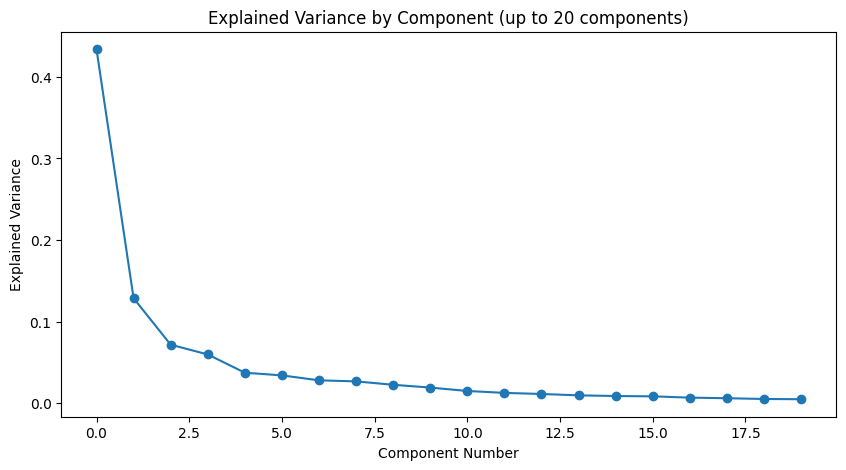

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

data = np.array(df['w2v_embedding'].tolist())

pca = PCA(n_components=20)
pca.fit(data)

explained_variances = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(explained_variances, 'o-')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Component (up to 20 components)')
plt.show()

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
reduced_pca = pca.fit_transform(np.array(df['w2v_embedding'].tolist()))

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(reduced_pca)

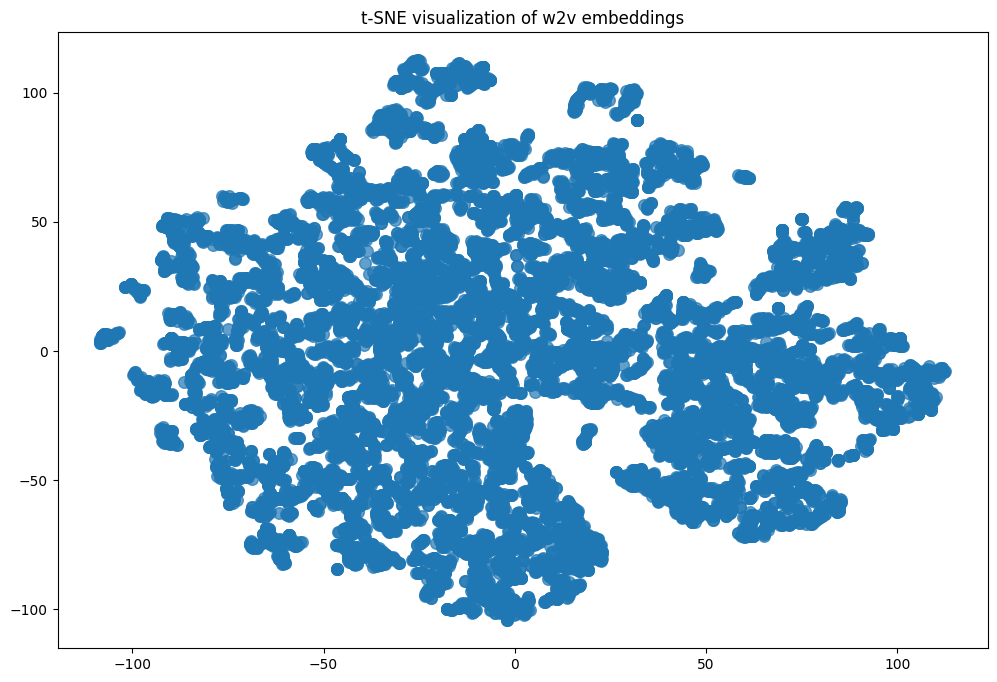

In [38]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], s=70, alpha=0.7)
plt.title('t-SNE visualization of w2v embeddings')
plt.show()

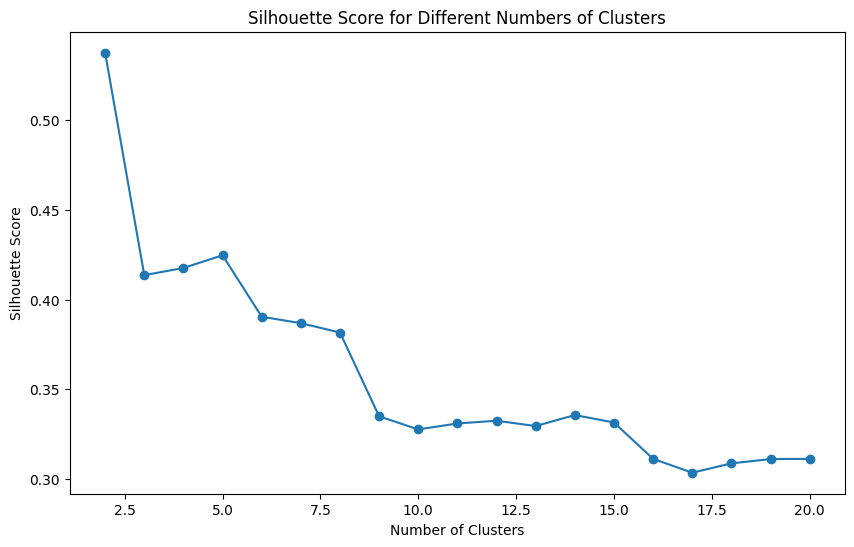

In [41]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,21))

silhouette_scores = [] 

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(reduced_pca)
    
    silhouette_avg = silhouette_score(reduced_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

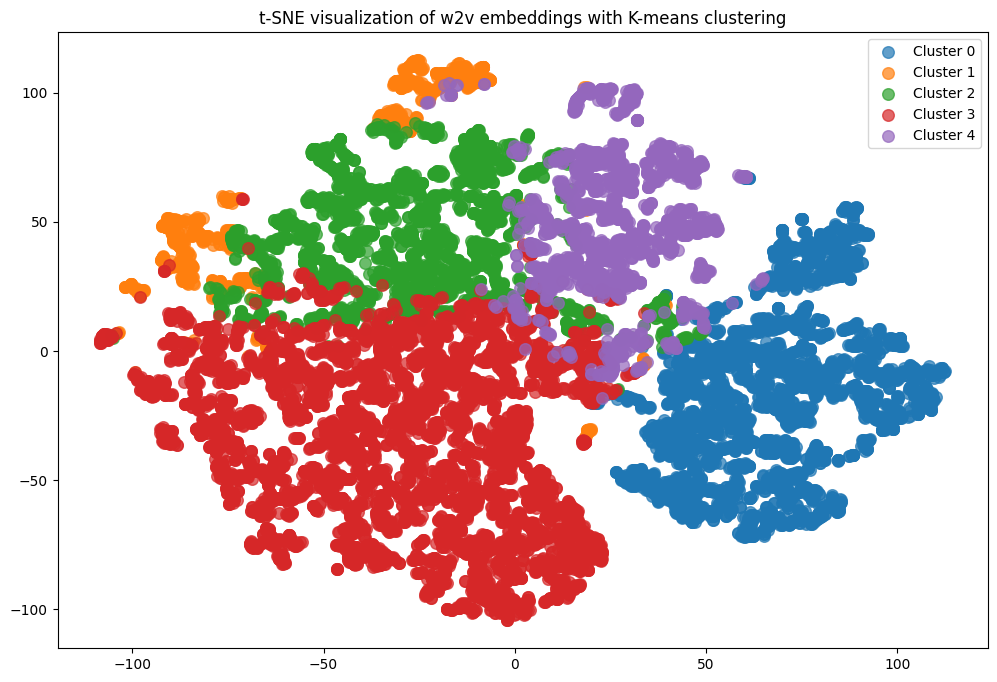

In [42]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_pca)

plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.scatter(reduced_tsne[cluster_labels == i, 0], 
                reduced_tsne[cluster_labels == i, 1], 
                label=f"Cluster {i}", 
                s=70, 
                alpha=0.7)
plt.title('t-SNE visualization of w2v embeddings with K-means clustering')
plt.legend()
plt.show()

In [43]:
df['transformer_embedding'] = df['transformer_embedding'].apply(lambda x: np.squeeze(x))

In [44]:
similarity_matrix_transformer = cosine_similarity(np.array(df['transformer_embedding'].tolist()))

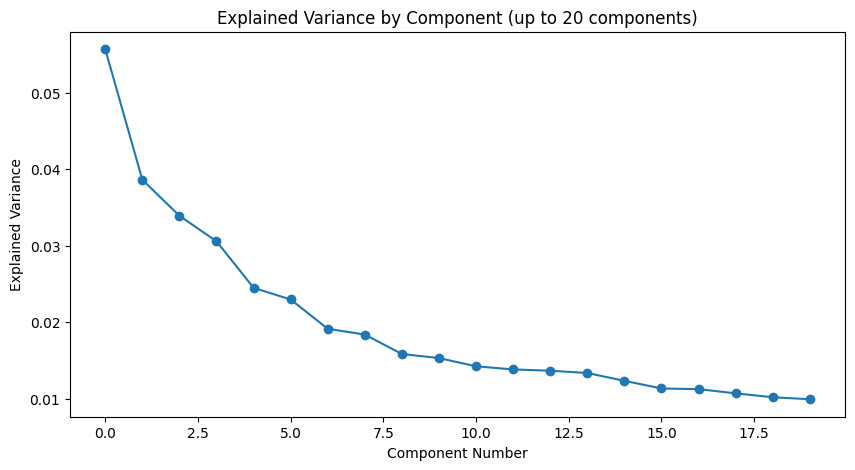

In [45]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

data = np.array(df['transformer_embedding'].tolist())

pca = PCA(n_components=20)
pca.fit(data)

explained_variances = pca.explained_variance_ratio_
plt.figure(figsize=(10, 5))
plt.plot(explained_variances, 'o-')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Component (up to 20 components)')
plt.show()

In [46]:
pca = PCA(n_components=6)
reduced_pca = pca.fit_transform(np.array(df['transformer_embedding'].tolist()))

In [47]:
tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(reduced_pca)

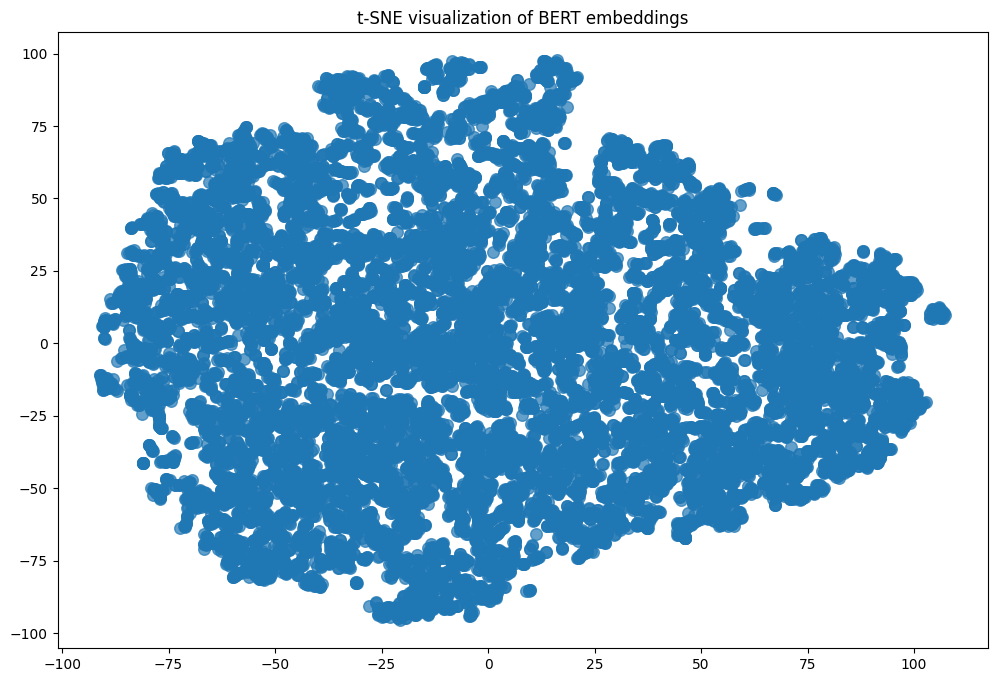

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], s=70, alpha=0.7)
plt.title('t-SNE visualization of BERT embeddings')
plt.show()

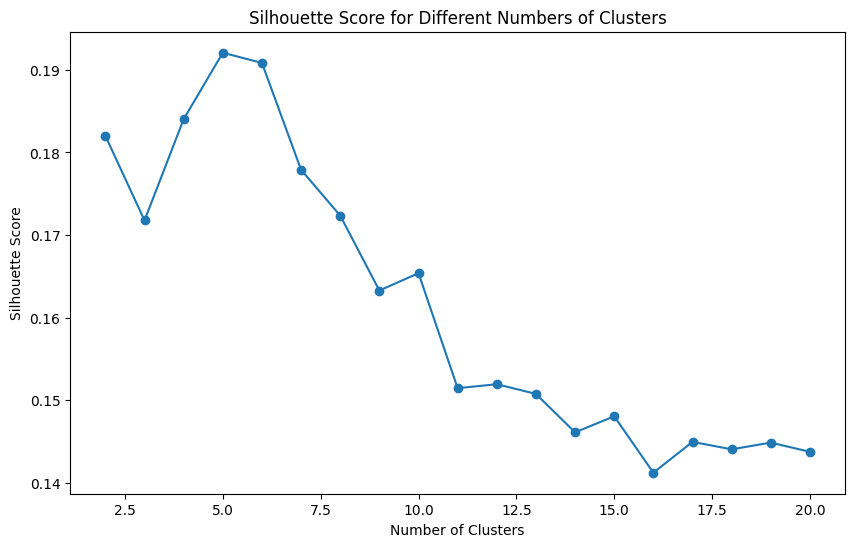

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_n_clusters = list(range(2,21))

silhouette_scores = [] 

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(reduced_pca)
    
    silhouette_avg = silhouette_score(reduced_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

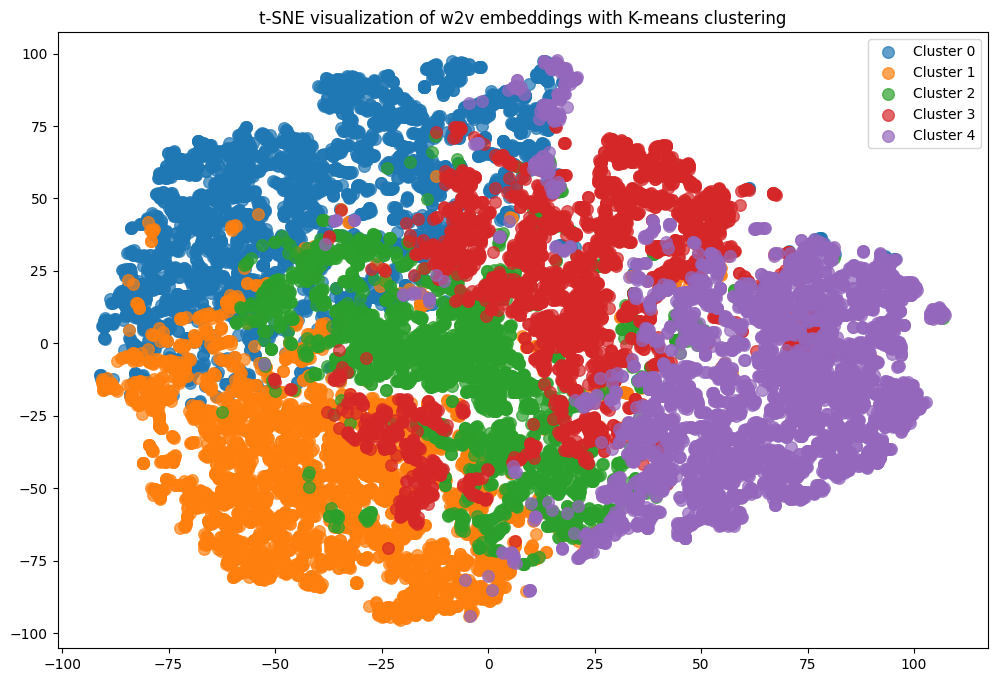

In [50]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_pca)

plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.scatter(reduced_tsne[cluster_labels == i, 0], 
                reduced_tsne[cluster_labels == i, 1], 
                label=f"Cluster {i}", 
                s=70, 
                alpha=0.7)
plt.title('t-SNE visualization of w2v embeddings with K-means clustering')
plt.legend()
plt.show()

In [ ]:
sub = df[df['artist_name'] == 'grimes']

In [ ]:
sub

In [ ]:
sample_record = df.sample(1)
sample_embedding_w2v = sample_record['w2v_embedding'].values[0]
sample_embedding = sample_record['transformer_embedding'].values[0]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

all_embeddings_w2v = np.array(df['w2v_embedding'].tolist())
similarity_scores_w2v = cosine_similarity([sample_embedding_w2v], all_embeddings_w2v)

In [ ]:
threshold_w2v = .9994
matches_w2v = np.where(similarity_scores_w2v > threshold_w2v)[1]

In [ ]:
matched_records_w2v = df.iloc[matches_w2v]
matched_scores_w2v = similarity_scores_w2v[0][matches_w2v]

len(matched_records_w2v)

In [ ]:
sample_record

In [ ]:
matched_records_w2v

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

all_embeddings = np.array(df['transformer_embedding'].tolist())
similarity_scores = cosine_similarity([sample_embedding], all_embeddings)

In [ ]:
threshold = 0.85
matches = np.where(similarity_scores > threshold)[1]

In [ ]:
matched_records = df.iloc[matches]
matched_scores = similarity_scores[0][matches]

matched_records

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def inspect_sample(df, threshold, embedding_column='transformer_embedding'):
    sample_record = df.sample(1)
    sample_embedding = sample_record[embedding_column].values[0]
    
    all_embeddings = np.array(df[embedding_column].tolist())
    similarity_scores = cosine_similarity([sample_embedding], all_embeddings)

    matches = np.where(similarity_scores > threshold)[1]
    matched_records = df.iloc[matches]
    matched_scores = similarity_scores[0][matches]

    same_artist_ratio = np.mean(matched_records['artist_name'] == sample_record['artist_name'].values[0])
    same_album_ratio = np.mean(matched_records['album_name'] == sample_record['album_name'].values[0])
    
    print("Sampled Record:\n", sample_record[['track_name', 'artist_name', 'album_name']])
    print("\nMatched Records:\n", matched_records[['track_name', 'artist_name', 'album_name']])
    print("\nMatched Scores:\n", matched_scores)
    print(f"\nSame Artist Ratio: {same_artist_ratio:.2f}")
    print(f"Same Album Ratio: {same_album_ratio:.2f}")
    
    return matched_records, matched_scores

for _ in range(5):
    print("="*50)
    matched_records, matched_scores = inspect_sample(df, threshold=0.88)

In [ ]:
def inspect_sample(df, threshold, embedding_column='transformer_embedding'):
    sample_record = df.sample(1)
    sample_embedding = sample_record[embedding_column].values[0]
    all_embeddings = np.array(df[embedding_column].tolist())
    similarity_scores = cosine_similarity([sample_embedding], all_embeddings)
    matches = np.where(similarity_scores > threshold)[1]
    matched_records = df.iloc[matches]
    
    same_artist_ratio = np.mean(matched_records['artist_name'] == sample_record['artist_name'].values[0])
    same_album_ratio = np.mean(matched_records['album_name'] == sample_record['album_name'].values[0])
    
    # Calculate album_song_coverage
    sample_album = sample_record['album_name'].values[0]
    total_songs_in_sample_album = df[df['album_name'] == sample_album].shape[0]
    matched_songs_from_sample_album = matched_records[matched_records['album_name'] == sample_album].shape[0]
    album_song_coverage = matched_songs_from_sample_album / total_songs_in_sample_album
    
    return same_artist_ratio, same_album_ratio, album_song_coverage

thresholds = np.linspace(0.80, 0.99, 20) 
results = []

for threshold in thresholds:
    artist_ratios = []
    album_ratios = []
    album_song_coverages = []
    for _ in range(30):
        artist_ratio, album_ratio, album_coverage = inspect_sample(df, threshold)
        artist_ratios.append(artist_ratio)
        album_ratios.append(album_ratio)
        album_song_coverages.append(album_coverage)
    
    avg_artist_ratio = np.mean(artist_ratios)
    avg_album_ratio = np.mean(album_ratios)
    avg_album_song_coverage = np.mean(album_song_coverages)
    results.append((threshold, avg_artist_ratio, avg_album_ratio, avg_album_song_coverage))
    print(f"Threshold: {threshold:.2f} | Avg Same Artist Ratio: {avg_artist_ratio:.2f} | Avg Same Album Ratio: {avg_album_ratio:.2f} | Avg Album Song Coverage: {avg_album_song_coverage:.2f}")

# If you want the results in a DataFrame for better visualization:
results_df = pd.DataFrame(results, columns=['Threshold', 'Avg Same Artist Ratio', 'Avg Same Album Ratio', 'Avg Album Song Coverage'])
results_df

In [59]:
def find_best_lyric_matches(df, sample_record, num_matches=5, embedding_column='transformer_embedding'):
    lyrics_df = df[df['df_source'] == 'lyrics']
    sample_embedding = sample_record[embedding_column].values[0]
    all_lyric_embeddings = np.array(lyrics_df[embedding_column].tolist())
    
    similarity_scores = cosine_similarity([sample_embedding], all_lyric_embeddings)[0]
    
    top_match_indices = np.argsort(similarity_scores)[-num_matches:][::-1]  # Get indices of top 5 similarity scores
    top_similarity_scores = similarity_scores[top_match_indices]
    
    matching_records = lyrics_df.iloc[top_match_indices]
    
    artists = matching_records['artist_name'].values
    tracks = matching_records['track_name'].values
    
    return artists, tracks, top_similarity_scores

def sample_and_match_for_all_artists(df, num_matches=5, similarity_threshold=0.86):
    unique_artists = df[df['df_source'] == 'disc']['artist_name'].unique()
    
    for artist in unique_artists:
        sample_record = df[(df['df_source'] == 'disc') & (df['artist_name'] == artist)].sample(1)
        
        matched_artists, matched_tracks, similarity_scores = find_best_lyric_matches(df, sample_record, num_matches)
        
        # Check if all similarity scores are above the threshold
        if all(score >= similarity_threshold for score in similarity_scores):
            print(f"Sampled Artist: {sample_record['artist_name'].values[0]} | Sampled Track: {sample_record['track_name'].values[0]} | Source: {sample_record['df_source'].values[0]}")
            for i in range(num_matches):
                matched_source = df[df['track_name'] == matched_tracks[i]]['df_source'].iloc[0]
                print(f"  Match {i+1}: Lyric Artist: {matched_artists[i]} | Matched Track: {matched_tracks[i]} | Source: {matched_source} | Similarity: {similarity_scores[i]:.2f}")
            print("---------------------------------------------------------------------------------")

sample_and_match_for_all_artists(df)

Sampled Artist: good morning | Sampled Track: whine time | Source: disc
  Match 1: Lyric Artist: good morning | Matched Track: warned you | Source: lyrics | Similarity: 0.95
  Match 2: Lyric Artist: good morning | Matched Track: look around | Source: lyrics | Similarity: 0.94
  Match 3: Lyric Artist: good morning | Matched Track: before my ears explode | Source: lyrics | Similarity: 0.94
  Match 4: Lyric Artist: good morning | Matched Track: after you | Source: disc | Similarity: 0.94
  Match 5: Lyric Artist: good morning | Matched Track: still commit crimes | Source: lyrics | Similarity: 0.93
---------------------------------------------------------------------------------
Sampled Artist: good night & good morning | Sampled Track: philadelphia | Source: disc
  Match 1: Lyric Artist: good morning | Matched Track: after you | Source: disc | Similarity: 0.90
  Match 2: Lyric Artist: good morning | Matched Track: look around | Source: lyrics | Similarity: 0.90
  Match 3: Lyric Artist: goo